In [1]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [63]:

from sklearn.linear_model import LogisticRegression
import numpy as np

import pandas as pd
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import os

In [91]:
df_yelp = pd.read_csv('yelp.csv')

In [92]:
df_yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [93]:
df_yelp.shape

(10000, 10)

In [94]:
df_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [95]:
df_yelp['stars'].unique()

array([5, 4, 2, 3, 1], dtype=int64)

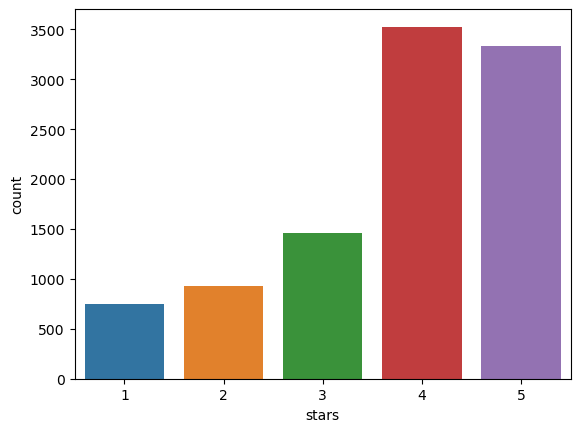

In [96]:
sns.countplot(df_yelp['stars'])
plt.show()

In [97]:
df_yelp['text length'] = df_yelp['text'].apply(len)

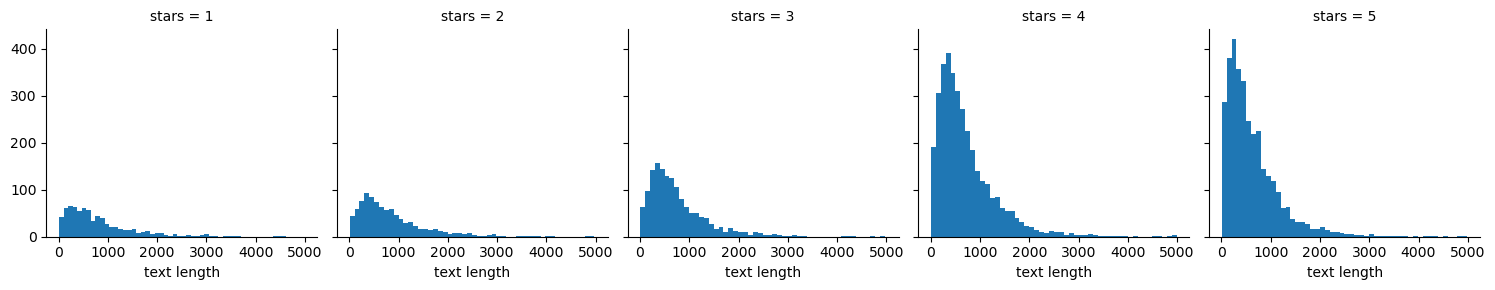

In [98]:
graph = sns.FacetGrid(df_yelp, col='stars')
graph.map(plt.hist, 'text length', bins=50)
plt.show()

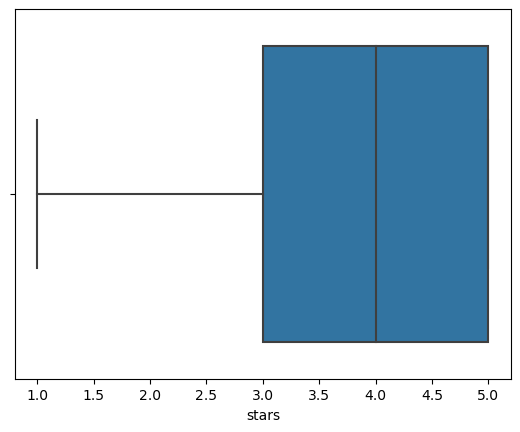

In [99]:
sns.boxplot(df_yelp['stars'])
plt.show()

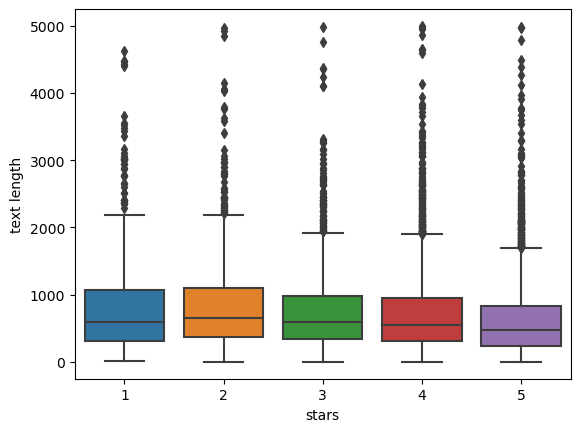

In [100]:
sns.boxplot(x = df_yelp['stars'], y = df_yelp['text length'] )
plt.show()

In [101]:
df_yelp['stars'].corr(df_yelp['text length'])

-0.11467419390104512

In [102]:
df_yelp_review = df_yelp[['stars','text']]
df_yelp_review['stars'] = df_yelp_review['stars'] - 1 

In [103]:
df_yelp_review.head()

,stars,text
0,4,My wife took me here on my birthday for breakf...
1,4,I have no idea why some people give bad review...
2,3,love the gyro plate. Rice is so good and I als...
3,4,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,4,General Manager Scott Petello is a good egg!!!...


In [104]:
df_yelp_review['text'] = df_yelp_review['text'].astype('str')

In [105]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'yours', 'shan', 'again', "mustn't", 'it', 'not', 'them', 'an', 'same', 'such', 'he', 'up', 'each', "weren't", 'won', "won't", 'as', 'weren', 'ours', 'him', 'should', 'during', 'her', 'shouldn', 're', "aren't", 'is', 'needn', 'doesn', "you've", 'there', 'yourself', 'very', 'his', 'my', 'do', 'once', "haven't", 'ma', 'of', 'the', 'these', 'are', 'then', 'any', 'did', 'hadn', 'out', 'mightn', 't', 'herself', 'who', 'about', 'more', "should've", 'from', 'what', 'we', 'that', 'you', "you're", 'whom', "hadn't", 'other', "didn't", 'hasn', "wouldn't", 'but', 'yourselves', "shan't", 'ourselves', "you'll", 'am', 'ain', 'they', 'how', 'both', 'mustn', 'after', "wasn't", 'or', 'and', 'itself', 've', 'when', 'with', 'only', "it's", 'theirs', 'll', 'where', 'those', 'been', 'having', 'further', 'between', 'i', 'was', 'under', 'nor', 'into', 'their', "couldn't", 'why', "hasn't", 'themselves', "that'll", 'down', 'myself', 'have', "she's", 'some', "doesn't", 'its', 'own', "needn't", 'aren', 'before',

[nltk_data] Downloading package stopwords to C:\Users\Shekhar
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations

In [107]:
def process_txt(text):
  # Lower Casing
    text = text.lower()
    text=text[1:]
    
    #Remove punctuations
    text = text.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(text)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
        if len(w)>1:
            word = wordLemm.lemmatize(w)
            finalwords.append(word)
    return ' '.join(finalwords)

In [108]:
df_yelp_review['text'] = df_yelp_review['text'].apply(lambda x: process_txt(x))
print('Text Preprocessing complete.')
df_yelp_review.head()

Text Preprocessing complete.


,stars,text
0,4,wife took birthday breakfast excellent weather...
1,4,idea people give bad review place go show plea...
2,3,ove gyro plate rice good also dig candy selection
3,4,osie dakota love chaparral dog park convenient...
4,4,eneral manager scott petello good egg go detai...


In [109]:
X=df_yelp_review.text
y=df_yelp_review.stars

In [110]:
df_yelp_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stars   10000 non-null  int64 
 1   text    10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [111]:
# Feature Extraction

import sklearn.feature_extraction.text as sk_text
Tfidf_vectorizer = sk_text.TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1), min_df = .05 , max_df = .85)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state =100)

In [113]:
Tfidf_vectorizer.fit(X_train)

TfidfVectorizer(max_df=0.85, max_features=1000, min_df=0.05,
                stop_words='english')

In [114]:
X_train = Tfidf_vectorizer.transform(X_train)
X_test  = Tfidf_vectorizer.transform(X_test)

In [115]:
# Create a Linear Regression model
lin_model = LinearRegression()

# Train the model
lin_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = lin_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 1.0873558906829273


In [116]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE test','RMSE train'])

# print the score card
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE test,RMSE train


In [117]:
# predict the 'sales' using predict()
predicted_claim_test = lin_model.predict(X_test)

# extract the 'sales' values from the test data
actual_claim_test = y_test

# predict the 'sales' using predict()
predicted_claim_train = lin_model.predict(X_train)

# extract the 'sales' values from the test data
actual_claim_train = y_train

# calculate rmse using rmse()
lin_model_rmse_test = rmse(actual_claim_test, predicted_claim_test)
lin_model_rmse_train = rmse(actual_claim_train, predicted_claim_train)

In [118]:
# Calculate R-squared
r2 = r2_score(actual_claim_test, predicted_claim_test)



# Print the R-squared and adjusted R-squared
print('R-squared:', r2)


R-squared: 0.2770904464641143


In [119]:
print(lin_model_rmse_test,lin_model_rmse_train)

1.042763583312597 0.9932981634898891


In [121]:
rf_model2 = RandomForestRegressor()

# Define the hyperparameters and their values to tune
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1,  4]
}

# Create an instance of GridSearchCV
rf_grid_search = GridSearchCV(rf_model2, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
rf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
rf_best_params = rf_grid_search.best_params_
rf_best_model = rf_grid_search.best_estimator_


In [122]:
# predict the 'sales' using predict()
predicted_claim_test = rf_best_model.predict(X_test)

# extract the 'sales' values from the test data
actual_claim_test = y_test

# predict the 'sales' using predict()
predicted_claim_train = rf_best_model.predict(X_train)

# extract the 'sales' values from the test data
actual_claim_train = y_train

# calculate rmse using rmse()
random_forest_gs_rmse_test = rmse(actual_claim_test, predicted_claim_test)
random_forest_gs_rmse_train = rmse(actual_claim_train, predicted_claim_train)

In [123]:
print(random_forest_gs_rmse_test,random_forest_gs_rmse_train)

1.1332331235922035 1.084871884909602


In [124]:
random_forest_gs_r2 = r2_score(y_test, predicted_claim_test)
print("R-squared:", random_forest_gs_r2)

R-squared: 0.1462105719850446


AS we can see from r square value of regression model that it is not acceptable to build a regression model for prediction of reviews , now let check classification models .

### Classification models 

In [133]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cf_matrix,columns = ['0','1','2','3','4'], index = ['0','1','2','3','4'])
    sns.heatmap(conf_matrix,annot=True)
    plt.show()

              precision    recall  f1-score   support

           0       0.37      0.30      0.33       233
           1       0.28      0.21      0.24       294
           2       0.36      0.22      0.27       433
           3       0.47      0.38      0.42      1054
           4       0.44      0.66      0.53       986

    accuracy                           0.43      3000
   macro avg       0.38      0.36      0.36      3000
weighted avg       0.42      0.43      0.41      3000



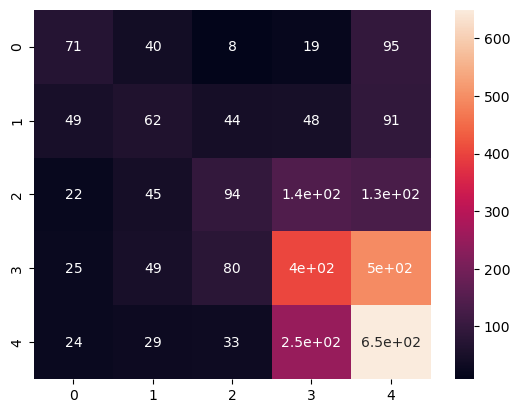

In [134]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)


              precision    recall  f1-score   support

           0       0.46      0.31      0.37       233
           1       0.41      0.14      0.21       294
           2       0.30      0.12      0.17       433
           3       0.44      0.58      0.50      1054
           4       0.52      0.61      0.56       986

    accuracy                           0.46      3000
   macro avg       0.43      0.35      0.36      3000
weighted avg       0.44      0.46      0.43      3000



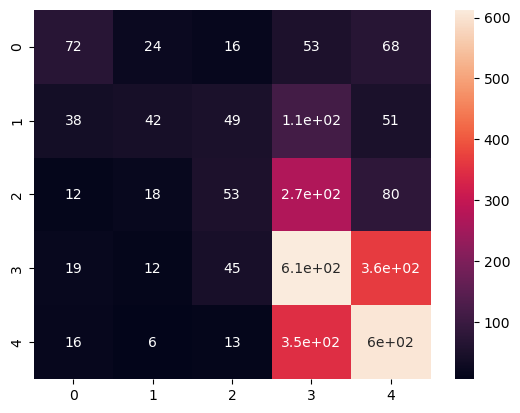

In [135]:
from sklearn.model_selection import cross_val_score
lr_model = LogisticRegression(C=0.5,max_iter=300)
lr_model.fit(X_train,y_train)
y_pred_lr = lr_model.predict(X_test)
model_Evaluate(lr_model)


              precision    recall  f1-score   support

           0       0.41      0.29      0.34       233
           1       0.29      0.14      0.19       294
           2       0.31      0.18      0.23       433
           3       0.41      0.49      0.45      1054
           4       0.47      0.57      0.52       986

    accuracy                           0.42      3000
   macro avg       0.38      0.33      0.34      3000
weighted avg       0.40      0.42      0.40      3000



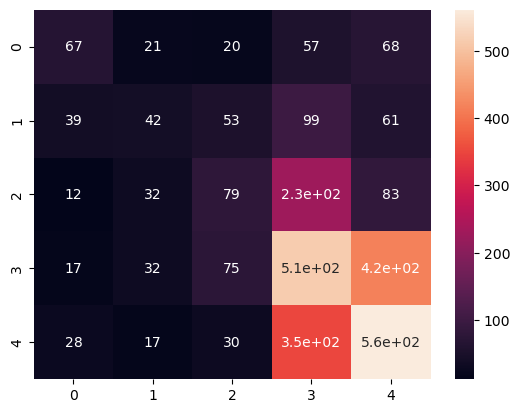

In [136]:
from xgboost import XGBClassifier
bst = XGBClassifier(n_estimators=28, max_depth=4, learning_rate=1, objective='multi:softmax')
bst.fit(X_train, y_train)
model_Evaluate(bst)
bst_preds = bst.predict(X_test)


In [137]:
# make a 2 group for review for boosting performance
df_yelp_review['stars']=df_yelp_review['stars'].replace(to_replace=[0,1,2],value=0)
df_yelp_review['stars']=df_yelp_review['stars'].replace(to_replace=[3,4],value=1)


df_yelp_review.head()

,stars,text
0,1,wife took birthday breakfast excellent weather...
1,1,idea people give bad review place go show plea...
2,1,ove gyro plate rice good also dig candy selection
3,1,osie dakota love chaparral dog park convenient...
4,1,eneral manager scott petello good egg go detai...


In [152]:
X = df_yelp_review['text']
y = df_yelp_review['stars']

In [153]:
df_yelp_review['stars'].unique()

array([1, 0], dtype=int64)

In [154]:
Tfidf_vectorizer = sk_text.TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1), min_df = .05 , max_df = .85)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state =100)

In [156]:
Tfidf_vectorizer.fit(X_train)

TfidfVectorizer(max_df=0.85, max_features=1000, min_df=0.05,
                stop_words='english')

In [157]:
X_train = Tfidf_vectorizer.transform(X_train)
X_test  = Tfidf_vectorizer.transform(X_test)

In [158]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cf_matrix,columns = ['0','1'], index = ['0','1'])
    sns.heatmap(conf_matrix,annot=True)
    plt.show()

              precision    recall  f1-score   support

           0       0.61      0.51      0.55       960
           1       0.78      0.84      0.81      2040

    accuracy                           0.74      3000
   macro avg       0.70      0.68      0.68      3000
weighted avg       0.73      0.74      0.73      3000



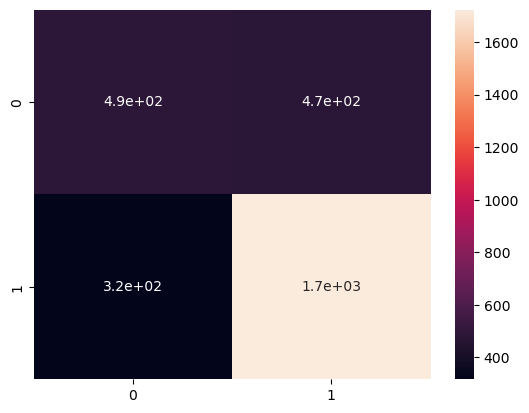

In [159]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.71      0.46      0.56       960
           1       0.78      0.91      0.84      2040

    accuracy                           0.77      3000
   macro avg       0.75      0.69      0.70      3000
weighted avg       0.76      0.77      0.75      3000



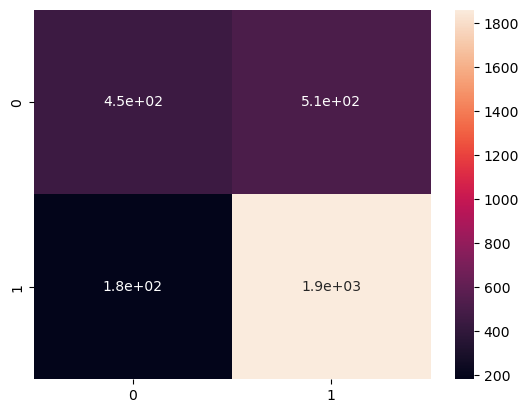

In [162]:
from sklearn.model_selection import cross_val_score
lr_model = LogisticRegression(C=0.5,max_iter=300)
lr_model.fit(X_train,y_train)
y_pred_lr = lr_model.predict(X_test)
model_Evaluate(lr_model)


              precision    recall  f1-score   support

           0       0.64      0.49      0.56       960
           1       0.78      0.87      0.82      2040

    accuracy                           0.75      3000
   macro avg       0.71      0.68      0.69      3000
weighted avg       0.74      0.75      0.74      3000



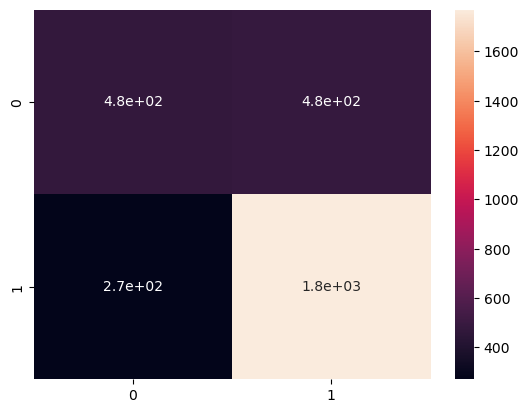

In [165]:
from xgboost import XGBClassifier
bst = XGBClassifier(n_estimators=20, max_depth=4, learning_rate=1)
bst.fit(X_train, y_train)
model_Evaluate(bst)
bst_preds = bst.predict(X_test)

In [171]:
final_result = pd.DataFrame({'Model Name':['Naive Bayes 1','Naive Bayes 2','Logistic Regression 1','Logistic Regression 2','XGBoost 1','XGBoost 2'],
                             'Accuracy' : [43,74,46,77,42,75]})

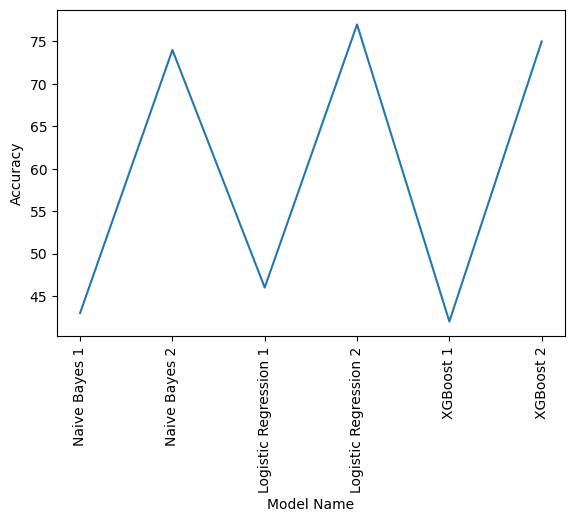

In [177]:
plt.figure(figsize=[6,4])
sns.lineplot(x = final_result['Model Name'],y=final_result['Accuracy'])
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()


### Neural Network

In [74]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils.np_utils import to_categorical
import re
from keras.optimizers import Adam

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}')

IndexError: tuple index out of range

NameError: name 'save_path' is not defined